# Exploratory Data Analysis (EDA) - Customer Churn Prediction

This notebook performs comprehensive exploratory data analysis on the cleaned customer churn dataset.

## Objectives:
1. Understand the dataset structure and characteristics
2. Analyze the target variable (Churn)
3. Explore relationships between features and churn
4. Identify key patterns and insights
5. Prepare insights for feature engineering and modeling


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
        
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## 1. Load Cleaned Dataset


In [5]:
# Load the cleaned dataset
data_path = r"C:\Users\ADMIN\Desktop\DataAnalytics\customer-churn-prediction\data\processed\cleaned_customer_churn.csv"

df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: 7,043 rows × 21 columns

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Basic Data Overview


In [6]:
# Dataset information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nData Types:")
print(df.dtypes)
print(f"\n\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])
print(f"\n\nDuplicate Rows: {df.duplicated().sum()}")
print(f"\n\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET INFORMATION

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Missing Values:
✓ No missing values found!


Duplicate Rows: 0


Memory Usage: 6.51 MB


In [7]:
# Statistical summary for numeric columns
print("=" * 60)
print("NUMERIC COLUMNS SUMMARY")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')
print(df[numeric_cols].describe())


NUMERIC COLUMNS SUMMARY
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [8]:
# Categorical columns summary
print("=" * 60)
print("CATEGORICAL COLUMNS SUMMARY")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts().head(10))
    print("-" * 40)


CATEGORICAL COLUMNS SUMMARY

gender:
  Unique values: 2
  Value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Partner:
  Unique values: 2
  Value counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Dependents:
  Unique values: 2
  Value counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

PhoneService:
  Unique values: 2
  Value counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

MultipleLines:
  Unique values: 3
  Value counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

InternetService:
  Unique values: 3
  Value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------

## 3. Target Variable Analysis (Churn)


CHURN DISTRIBUTION

Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentages:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


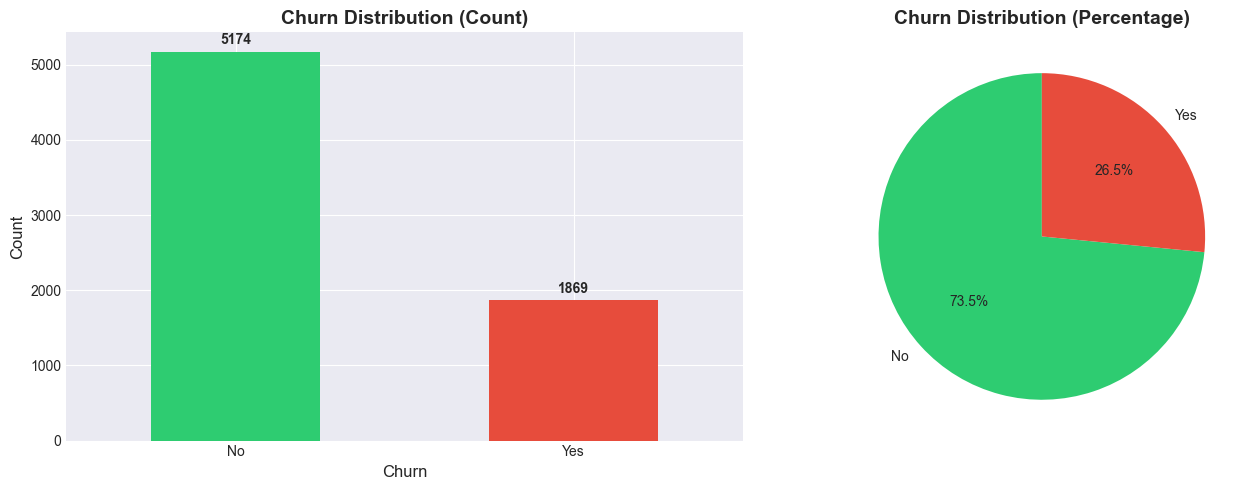


⚠ Class Imbalance: 73.5% vs 26.5%


In [ ]:
# Churn distribution
if 'Churn' in df.columns:
    churn_counts = df['Churn'].value_counts()
    churn_percent = df['Churn'].value_counts(normalize=True) * 100
    
    print("=" * 60)
    print("CHURN DISTRIBUTION")
    print("=" * 60)
    print(f"\nCounts:")
    print(churn_counts)
    print(f"\nPercentages:")
    print(churn_percent.round(2))
    
    # Visualize churn distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
    axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Churn', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x', rotation=0)
    for i, v in enumerate(churn_counts.values):
        axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
                colors=['#2ecc71', '#e74c3c'], startangle=90)
    axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n⚠ Class Imbalance: {churn_percent.iloc[0]:.1f}% vs {churn_percent.iloc[1]:.1f}%")
else:
    print("⚠ 'Churn' column not found in dataset")


## 4. Univariate Analysis - Numeric Features


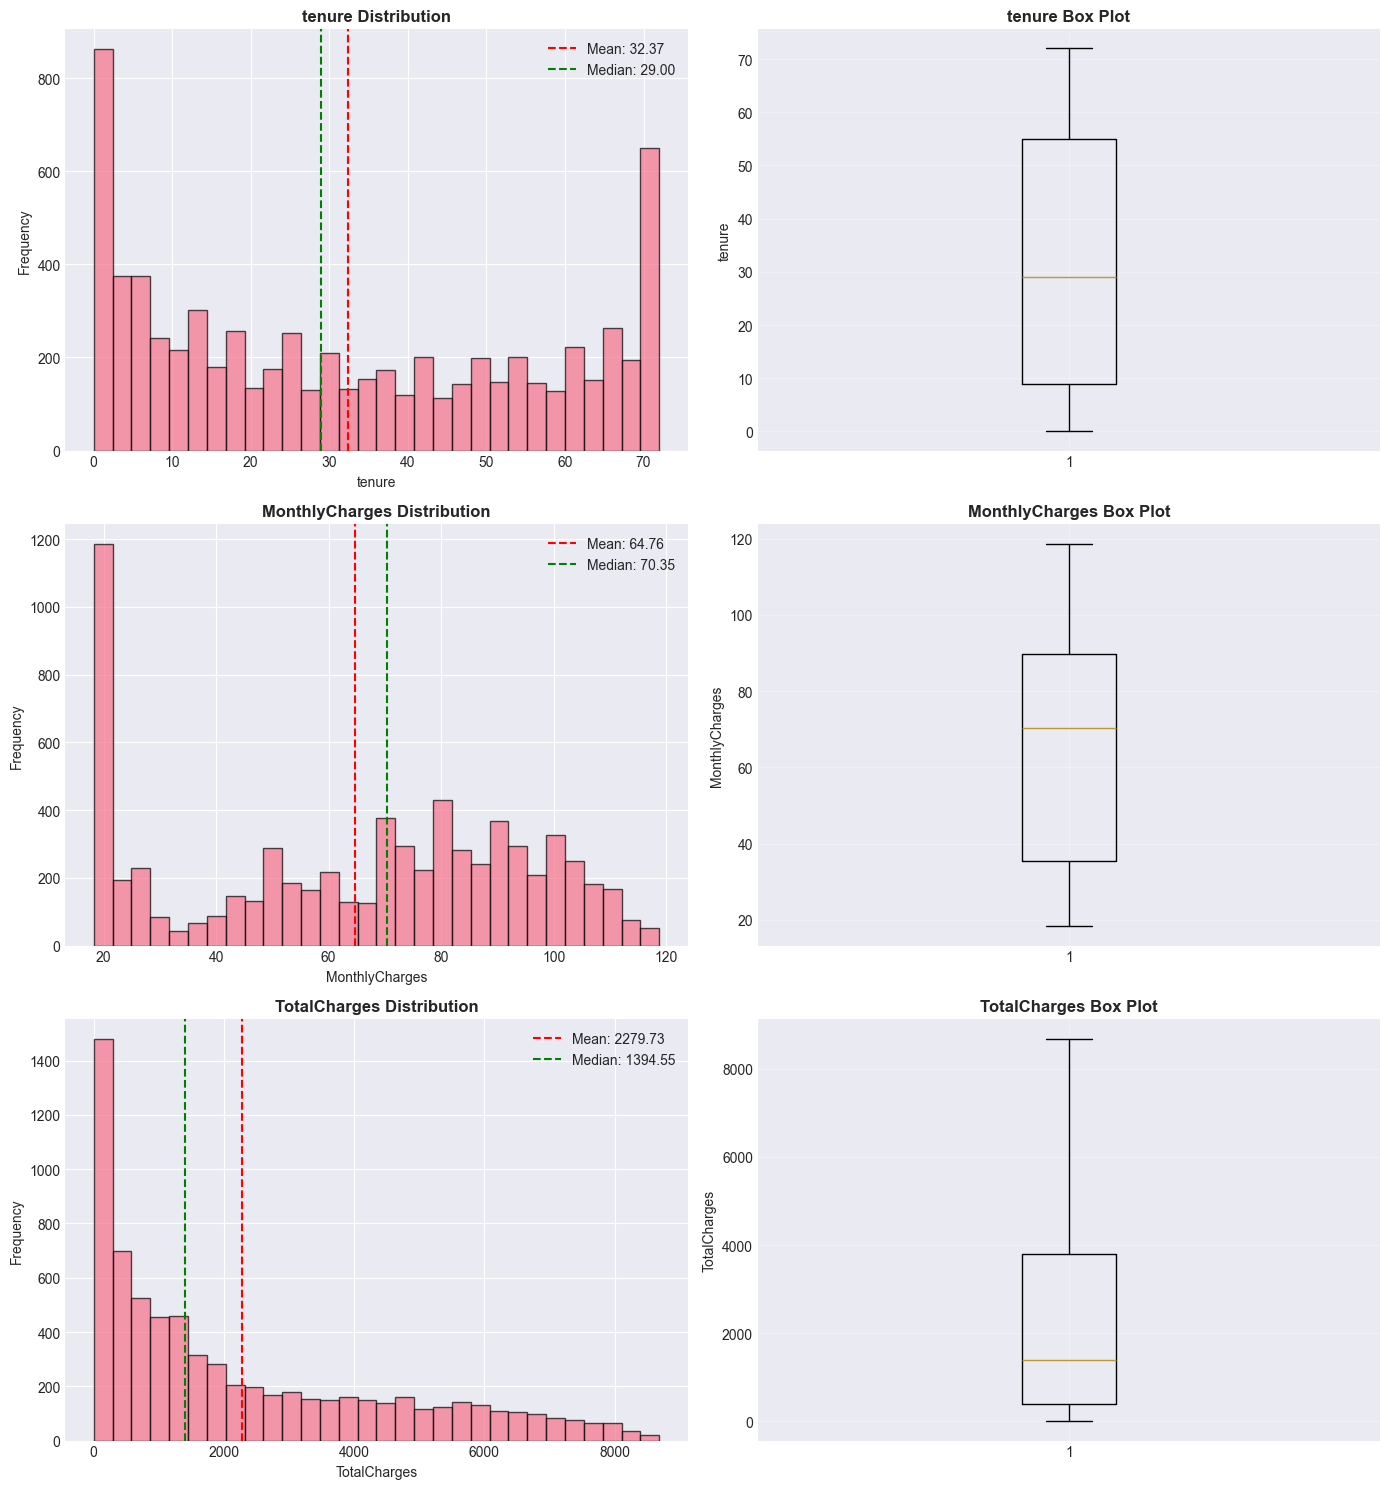

In [ ]:
# Distribution of numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_features = [col for col in numeric_features if col in df.columns]

if numeric_features:
    fig, axes = plt.subplots(len(numeric_features), 2, figsize=(14, 5*len(numeric_features)))
    
    if len(numeric_features) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(numeric_features):
        # Histogram
        axes[idx, 0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        axes[idx, 0].set_xlabel(col, fontsize=10)
        axes[idx, 0].set_ylabel('Frequency', fontsize=10)
        axes[idx, 0].axvline(df[col].mean(), color='red', linestyle='--', 
                            label=f'Mean: {df[col].mean():.2f}')
        axes[idx, 0].axvline(df[col].median(), color='green', linestyle='--', 
                            label=f'Median: {df[col].median():.2f}')
        axes[idx, 0].legend()
        
        # Box plot
        axes[idx, 1].boxplot(df[col].dropna(), vert=True)
        axes[idx, 1].set_title(f'{col} Box Plot', fontsize=12, fontweight='bold')
        axes[idx, 1].set_ylabel(col, fontsize=10)
        axes[idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 5. Bivariate Analysis - Features vs Churn


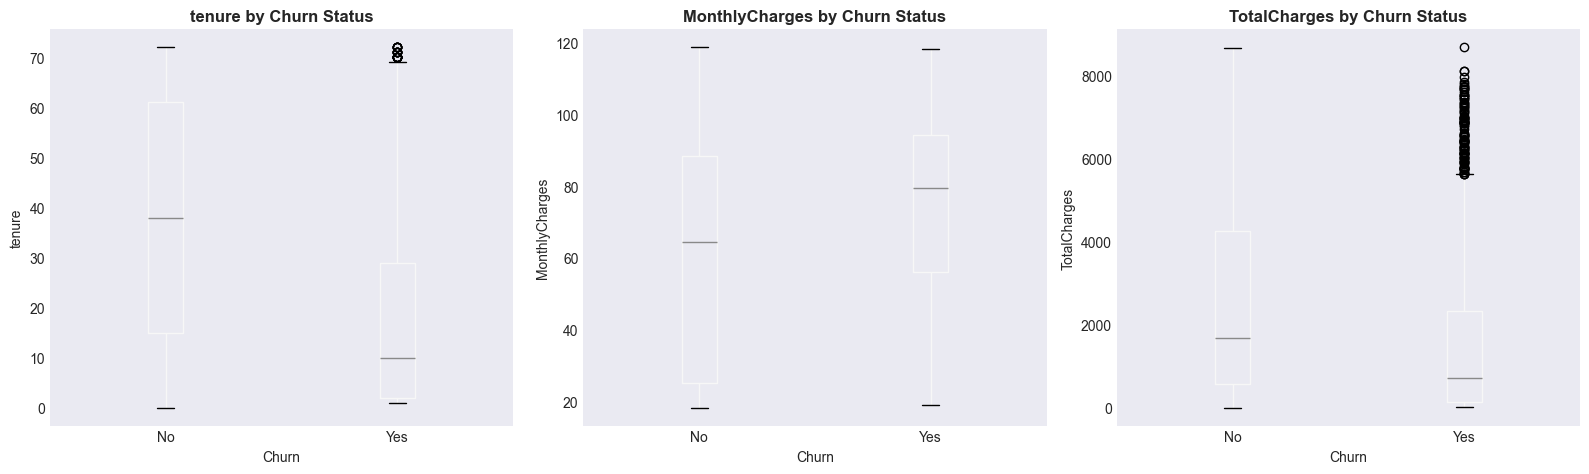


NUMERIC FEATURES: CHURN vs NO CHURN

tenure:
  Churned:     Mean=17.98, Median=10.00
  Not Churned: Mean=37.57, Median=38.00
  Difference:  19.59

MonthlyCharges:
  Churned:     Mean=74.44, Median=79.65
  Not Churned: Mean=61.27, Median=64.43
  Difference:  13.18

TotalCharges:
  Churned:     Mean=1531.80, Median=703.55
  Not Churned: Mean=2549.91, Median=1679.53
  Difference:  1018.12


In [ ]:
# Numeric features vs Churn
if 'Churn' in df.columns:
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    numeric_features = [col for col in numeric_features if col in df.columns]
    
    if numeric_features:
        fig, axes = plt.subplots(1, len(numeric_features), figsize=(16, 5))
        
        if len(numeric_features) == 1:
            axes = [axes]
        
        for idx, col in enumerate(numeric_features):
            # Box plot by Churn
            df.boxplot(column=col, by='Churn', ax=axes[idx], grid=False)
            axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Churn', fontsize=10)
            axes[idx].set_ylabel(col, fontsize=10)
            axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
        
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
        
        # Statistical comparison
        print("\n" + "=" * 60)
        print("NUMERIC FEATURES: CHURN vs NO CHURN")
        print("=" * 60)
        for col in numeric_features:
            churned = df[df['Churn'] == 'Yes'][col]
            not_churned = df[df['Churn'] == 'No'][col]
            print(f"\n{col}:")
            print(f"  Churned:     Mean={churned.mean():.2f}, Median={churned.median():.2f}")
            print(f"  Not Churned: Mean={not_churned.mean():.2f}, Median={not_churned.median():.2f}")
            print(f"  Difference:  {abs(churned.mean() - not_churned.mean()):.2f}")


CHURN RATES BY CATEGORY

gender:
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16

SeniorCitizen:
Churn             No    Yes
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68

Partner:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66

Dependents:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45

PhoneService:
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71

MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61

InternetService:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40

OnlineSecurity:
Churn                   No    Yes
OnlineSecurity                 

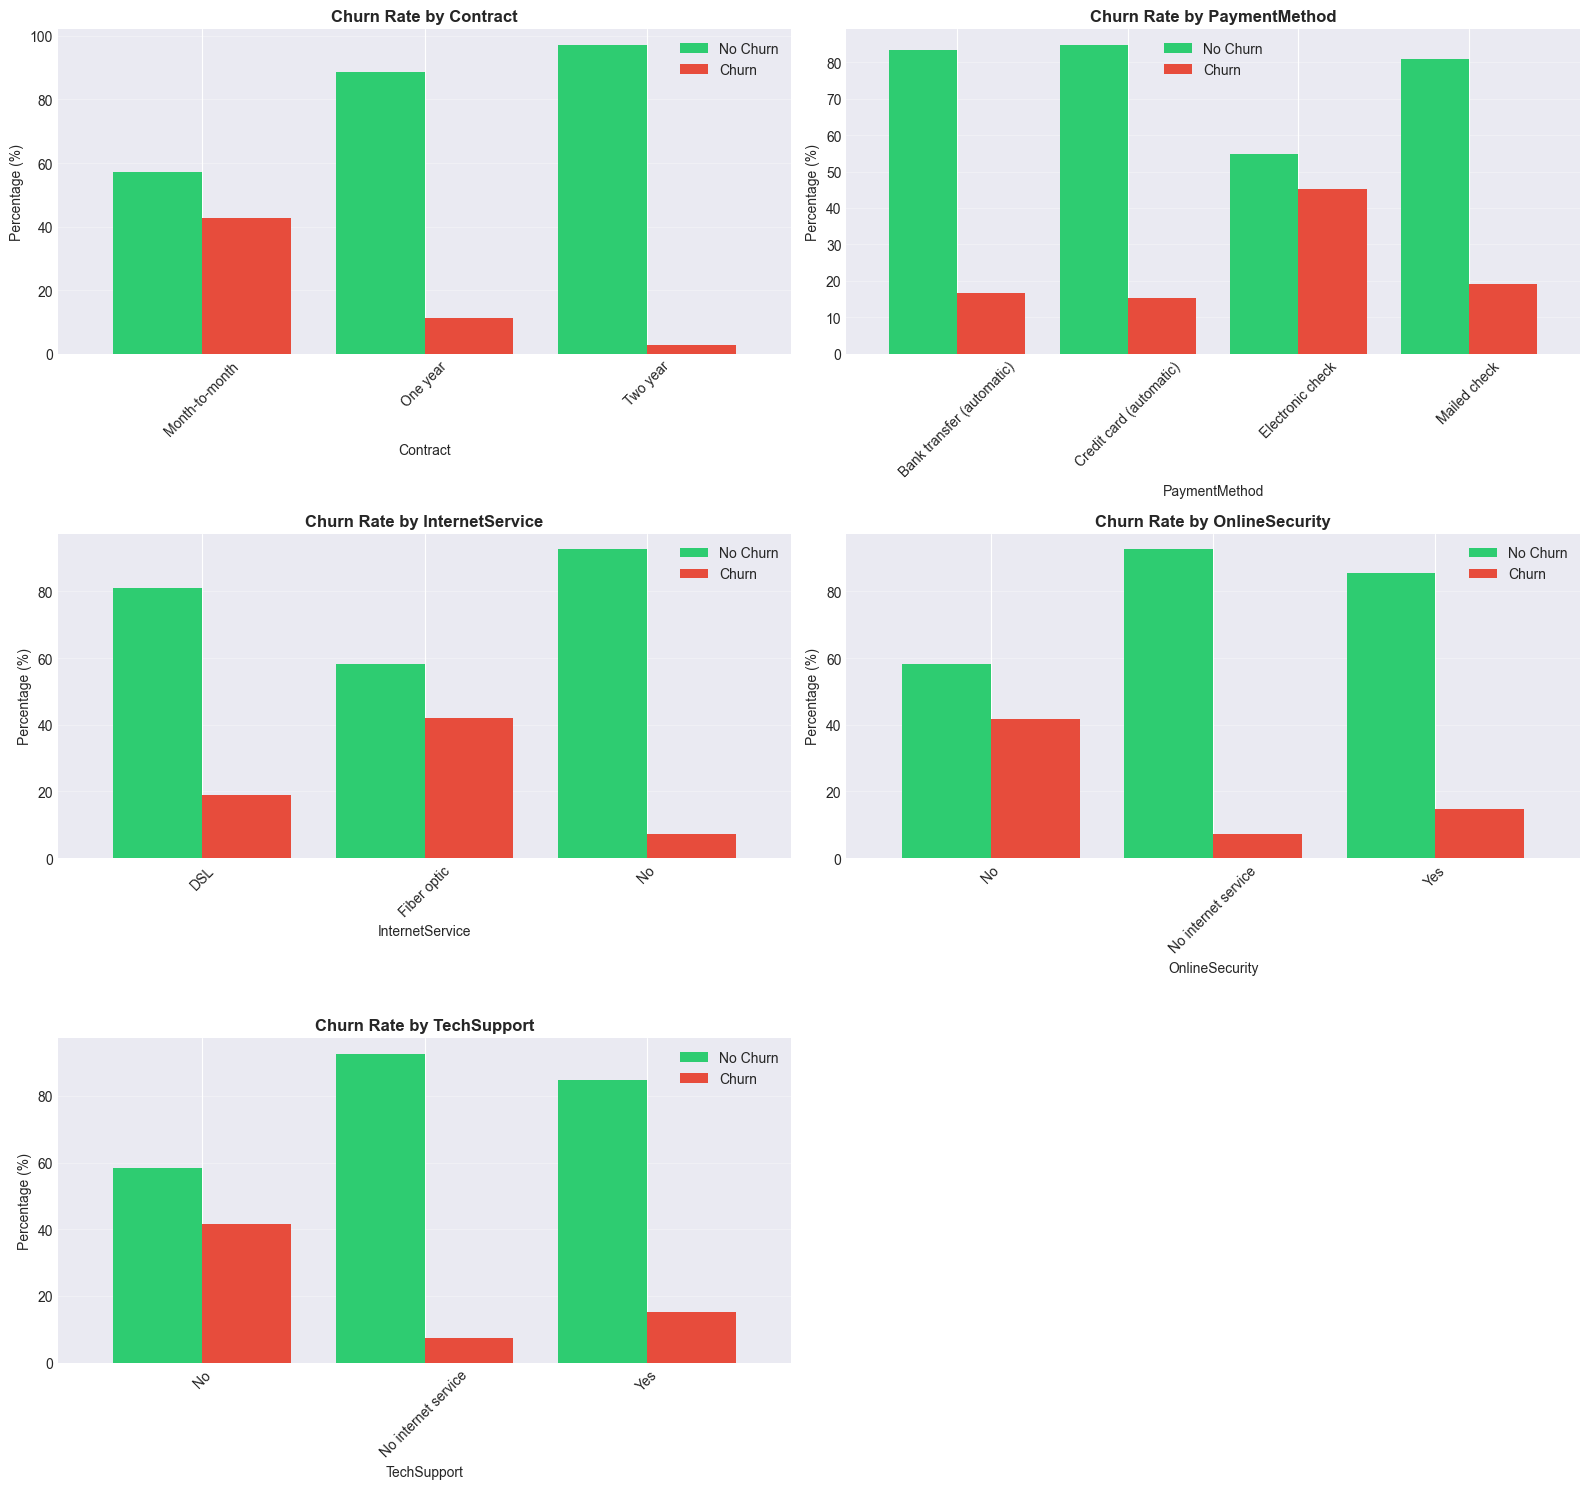

In [ ]:
# Categorical features vs Churn
if 'Churn' in df.columns:
    categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                           'PhoneService', 'MultipleLines', 'InternetService',
                           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                           'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'Contract', 'PaperlessBilling', 'PaymentMethod']
    
    categorical_features = [col for col in categorical_features if col in df.columns]
    
    # Calculate churn rates by category
    print("=" * 60)
    print("CHURN RATES BY CATEGORY")
    print("=" * 60)
    
    churn_rates = {}
    for col in categorical_features:
        crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
        churn_rates[col] = crosstab['Yes'] if 'Yes' in crosstab.columns else pd.Series()
        print(f"\n{col}:")
        print(crosstab.round(2))
    
    # Visualize top categorical features
    top_features = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport']
    top_features = [col for col in top_features if col in categorical_features]
    
    if top_features:
        n_cols = 2
        n_rows = (len(top_features) + 1) // 2
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
        
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for idx, col in enumerate(top_features[:n_rows*n_cols]):
            row = idx // n_cols
            col_idx = idx % n_cols
            
            # Create crosstab
            crosstab = pd.crosstab(df[col], df['Churn'])
            crosstab_pct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
            
            # Plot
            crosstab_pct.plot(kind='bar', ax=axes[row, col_idx], 
                             color=['#2ecc71', '#e74c3c'], width=0.8)
            axes[row, col_idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
            axes[row, col_idx].set_xlabel(col, fontsize=10)
            axes[row, col_idx].set_ylabel('Percentage (%)', fontsize=10)
            axes[row, col_idx].legend(['No Churn', 'Churn'], loc='best')
            axes[row, col_idx].tick_params(axis='x', rotation=45)
            axes[row, col_idx].grid(axis='y', alpha=0.3)
        
        # Hide empty subplots
        for idx in range(len(top_features), n_rows * n_cols):
            row = idx // n_cols
            col_idx = idx % n_cols
            axes[row, col_idx].axis('off')
        
        plt.tight_layout()
        plt.show()


## 6. Correlation Analysis


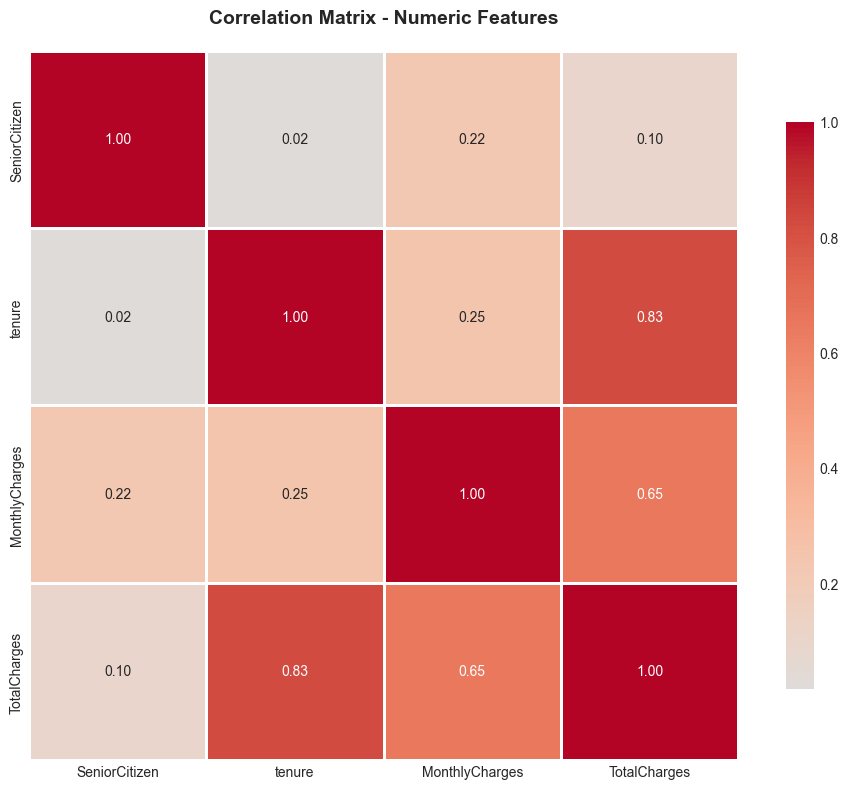


CORRELATION WITH CHURN
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.198
tenure           -0.352
Name: Churn_encoded, dtype: float64


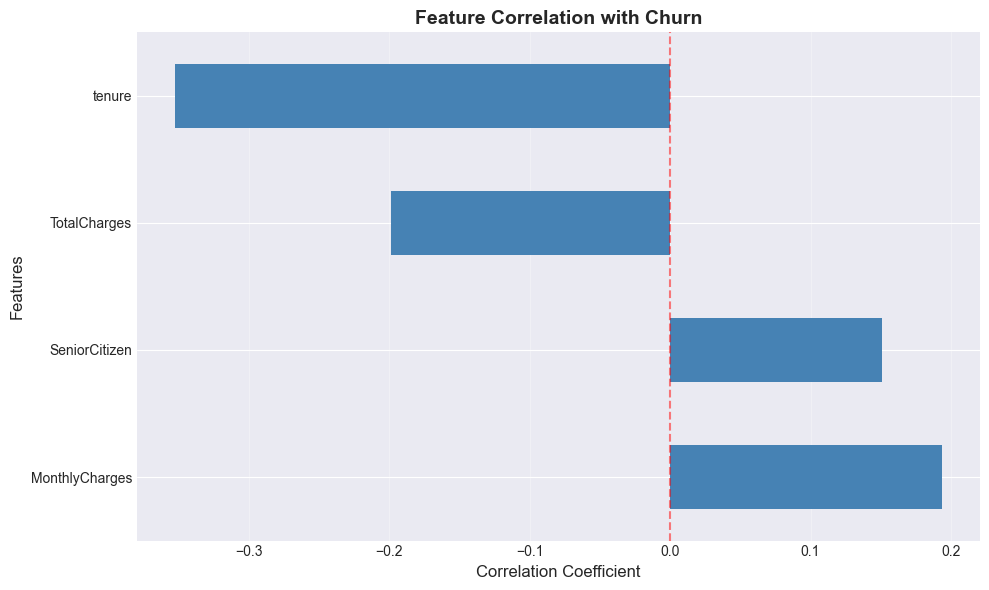

In [ ]:
# Correlation matrix for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Correlation with Churn (if Churn is encoded)
    if 'Churn' in df.columns:
        # Encode Churn for correlation
        df_encoded = df.copy()
        df_encoded['Churn_encoded'] = (df_encoded['Churn'] == 'Yes').astype(int)
        
        churn_corr = df_encoded[numeric_cols + ['Churn_encoded']].corr()['Churn_encoded'].sort_values(ascending=False)
        churn_corr = churn_corr.drop('Churn_encoded')
        
        print("\n" + "=" * 60)
        print("CORRELATION WITH CHURN")
        print("=" * 60)
        print(churn_corr.round(3))
        
        # Visualize
        plt.figure(figsize=(10, 6))
        churn_corr.plot(kind='barh', color='steelblue')
        plt.title('Feature Correlation with Churn', fontsize=14, fontweight='bold')
        plt.xlabel('Correlation Coefficient', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()


## 7. Key Insights and Patterns


In [ ]:
# Generate key insights
print("=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

if 'Churn' in df.columns:
    # Overall churn rate
    overall_churn = (df['Churn'] == 'Yes').mean() * 100
    print(f"\n1. Overall Churn Rate: {overall_churn:.2f}%")
    
    # Top risk factors
    print("\n2. Top Risk Factors (Highest Churn Rates):")
    risk_factors = {}
    
    categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 
                          'OnlineSecurity', 'TechSupport', 'OnlineBackup']
    categorical_features = [col for col in categorical_features if col in df.columns]
    
    for col in categorical_features:
        churn_by_category = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        max_churn = churn_by_category.max()
        risk_factors[col] = (churn_by_category.idxmax(), max_churn)
    
    # Sort by churn rate
    sorted_risks = sorted(risk_factors.items(), key=lambda x: x[1][1], reverse=True)
    for i, (feature, (category, rate)) in enumerate(sorted_risks[:5], 1):
        print(f"   {i}. {feature} = '{category}': {rate:.1f}% churn rate")
    
    # Tenure insights
    if 'tenure' in df.columns:
        print("\n3. Tenure Insights:")
        low_tenure_churn = df[df['tenure'] <= 12]['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        high_tenure_churn = df[df['tenure'] > 12]['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        print(f"   - Low tenure (≤12 months): {low_tenure_churn:.1f}% churn rate")
        print(f"   - High tenure (>12 months): {high_tenure_churn:.1f}% churn rate")
    
    # Monthly charges insights
    if 'MonthlyCharges' in df.columns:
        print("\n4. Monthly Charges Insights:")
        high_charge_churn = df[df['MonthlyCharges'] > df['MonthlyCharges'].median()]['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        low_charge_churn = df[df['MonthlyCharges'] <= df['MonthlyCharges'].median()]['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        print(f"   - High charges (>median): {high_charge_churn:.1f}% churn rate")
        print(f"   - Low charges (≤median): {low_charge_churn:.1f}% churn rate")
    
    # Contract insights
    if 'Contract' in df.columns:
        print("\n5. Contract Type Impact:")
        contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        for contract, rate in contract_churn.items():
            print(f"   - {contract}: {rate:.1f}% churn rate")

print("\n" + "=" * 60)


KEY INSIGHTS

1. Overall Churn Rate: 26.54%

2. Top Risk Factors (Highest Churn Rates):
   1. PaymentMethod = 'Electronic check': 45.3% churn rate
   2. Contract = 'Month-to-month': 42.7% churn rate
   3. InternetService = 'Fiber optic': 41.9% churn rate
   4. OnlineSecurity = 'No': 41.8% churn rate
   5. TechSupport = 'No': 41.6% churn rate

3. Tenure Insights:


AttributeError: 'bool' object has no attribute 'mean'

## 8. Summary Statistics by Churn Status


COMPARATIVE STATISTICS: CHURNED vs NOT CHURNED
      tenure                       MonthlyCharges                       \
        mean median    std min max           mean median    std    min   
Churn                                                                    
No     37.57   38.0  24.11   0  72          61.27  64.43  31.09  18.25   
Yes    17.98   10.0  19.53   1  72          74.44  79.65  24.67  18.85   

              TotalCharges                                    
          max         mean   median      std    min      max  
Churn                                                         
No     118.75      2549.91  1679.52  2329.95   0.00  8672.45  
Yes    118.35      1531.80   703.55  1890.82  18.85  8684.80  


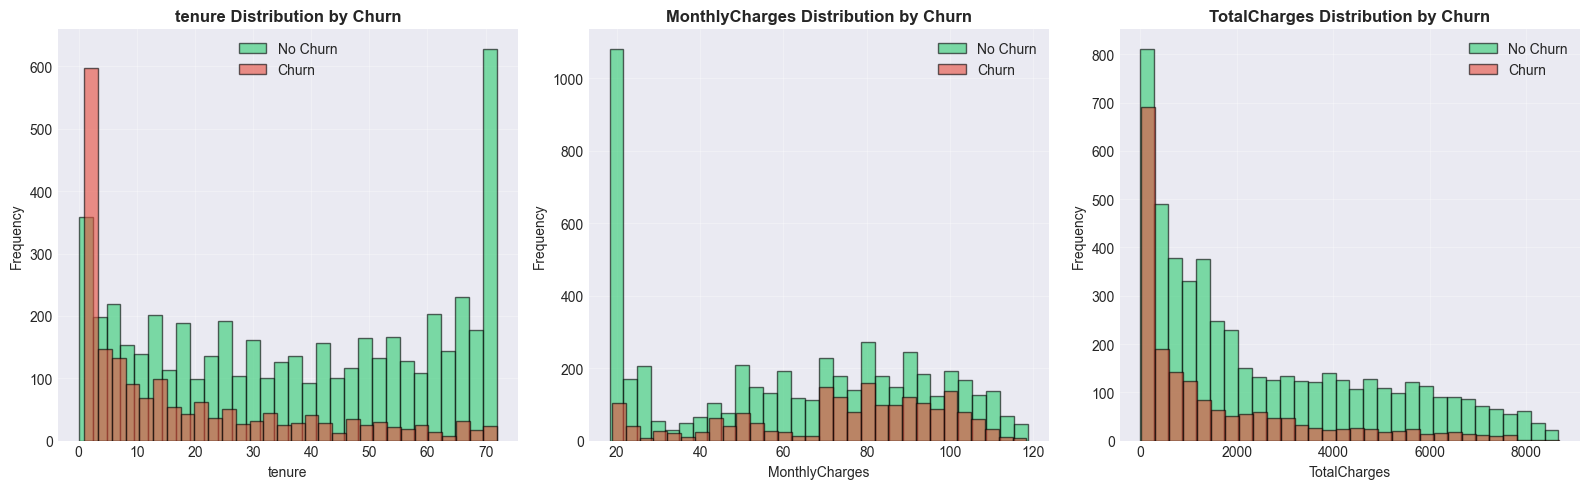

In [9]:
# Compare statistics between churned and non-churned customers
if 'Churn' in df.columns:
    numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    if numeric_cols:
        print("=" * 60)
        print("COMPARATIVE STATISTICS: CHURNED vs NOT CHURNED")
        print("=" * 60)
        
        comparison = df.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])
        print(comparison.round(2))
        
        # Create comparison visualization
        fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 5))
        if len(numeric_cols) == 1:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            churned = df[df['Churn'] == 'Yes'][col]
            not_churned = df[df['Churn'] == 'No'][col]
            
            axes[idx].hist(not_churned, bins=30, alpha=0.6, label='No Churn', color='#2ecc71', edgecolor='black')
            axes[idx].hist(churned, bins=30, alpha=0.6, label='Churn', color='#e74c3c', edgecolor='black')
            axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Frequency', fontsize=10)
            axes[idx].legend()
            axes[idx].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()


## 9. EDA Summary and Next Steps

### Key Findings:
1. **Class Distribution**: Check if the dataset is balanced or imbalanced
2. **High-Risk Groups**: Identify customer segments with highest churn rates
3. **Feature Importance**: Determine which features are most predictive
4. **Data Quality**: Verify data is clean and ready for modeling

### Recommendations for Feature Engineering:
- Consider creating tenure groups (e.g., 0-12, 13-24, 25-48, 49+ months)
- Create interaction features (e.g., MonthlyCharges × Contract type)
- Encode categorical variables appropriately
- Handle class imbalance if present
- Consider feature scaling/normalization

### Next Steps:
1. Feature Engineering
2. Model Selection
3. Model Training
4. Model Evaluation
